# melt rate feedbacks

*preliminary ideas:* can we use the ISOMIP+ data to dig into the relative effect of thermal driving and friction velocity on melt rate?

Also, notice that the average friction velocity has a minimum of c_drag^0.5*u_tide and it's average gets close to that, meaning that this somewhat arbitrary u_tide has a big impact on the melt.

In [6]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cftime
import cmocean as cm

from netCDF4 import Dataset
import os.path
import matplotlib.colors as colors

In [7]:
## folder where the isomip-plus github repo is located
baserepo = '/g/data/x77/cy8964/isomip-plus/'
## folder where you downloaded the zipped Google Drive data
basedrive = '/scratch/x77/cy8964/ISOMIP+Data/'

# load the data from the text files, which point to the right location of the file in the drive structure
Ocean0_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean0_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)


In [8]:
# set a cycling colour/linestyle, since the default only has 10 options

from cycler import cycler
cc = ( cycler(linestyle=['-', '--', '-.'])*cycler(color=['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00'])
     )
plt.rc('axes', prop_cycle=cc)

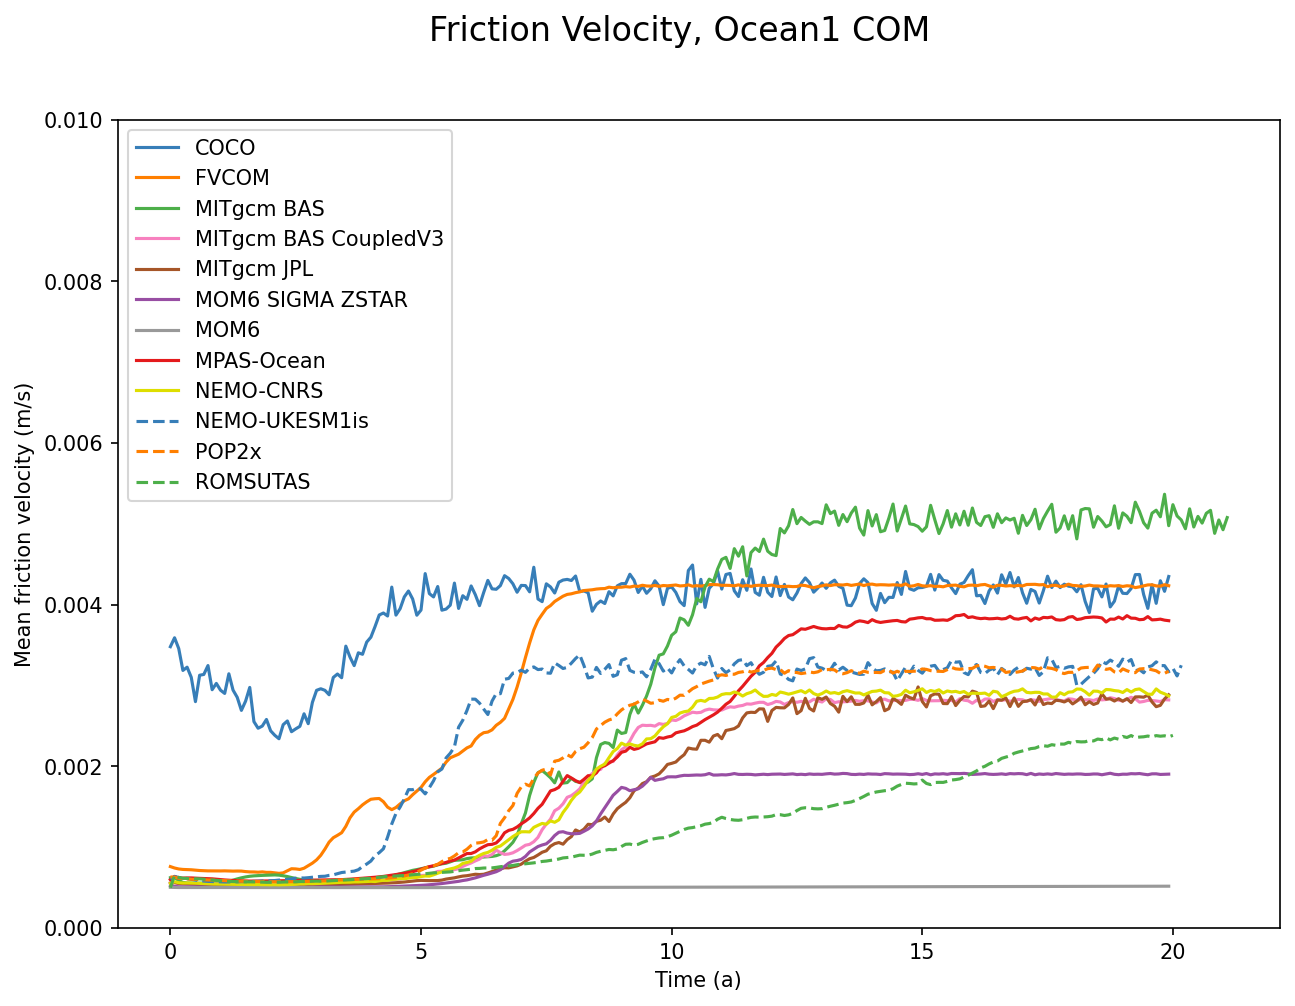

In [13]:
expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)
fig = plt.figure(figsize=(10,7),facecolor='w',dpi = 150)
for i in np.arange(length):
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    fr = data.frictionVelocity
    mr = data.meltRate # use this and .where() to mask out parts of domain that aren't melting
    fr = fr.where(mr < 1e36).where(mr !=0).mean(['nx','ny'])#.plot()
    plt.plot(fr.nTime/12, (fr),label = labels[i])
fig.suptitle('Friction Velocity, Ocean1 COM', fontsize = 16);
plt.ylim(0,0.01)
plt.ylabel('Mean friction velocity (m/s)')
plt.xlabel('Time (a)')
plt.legend()

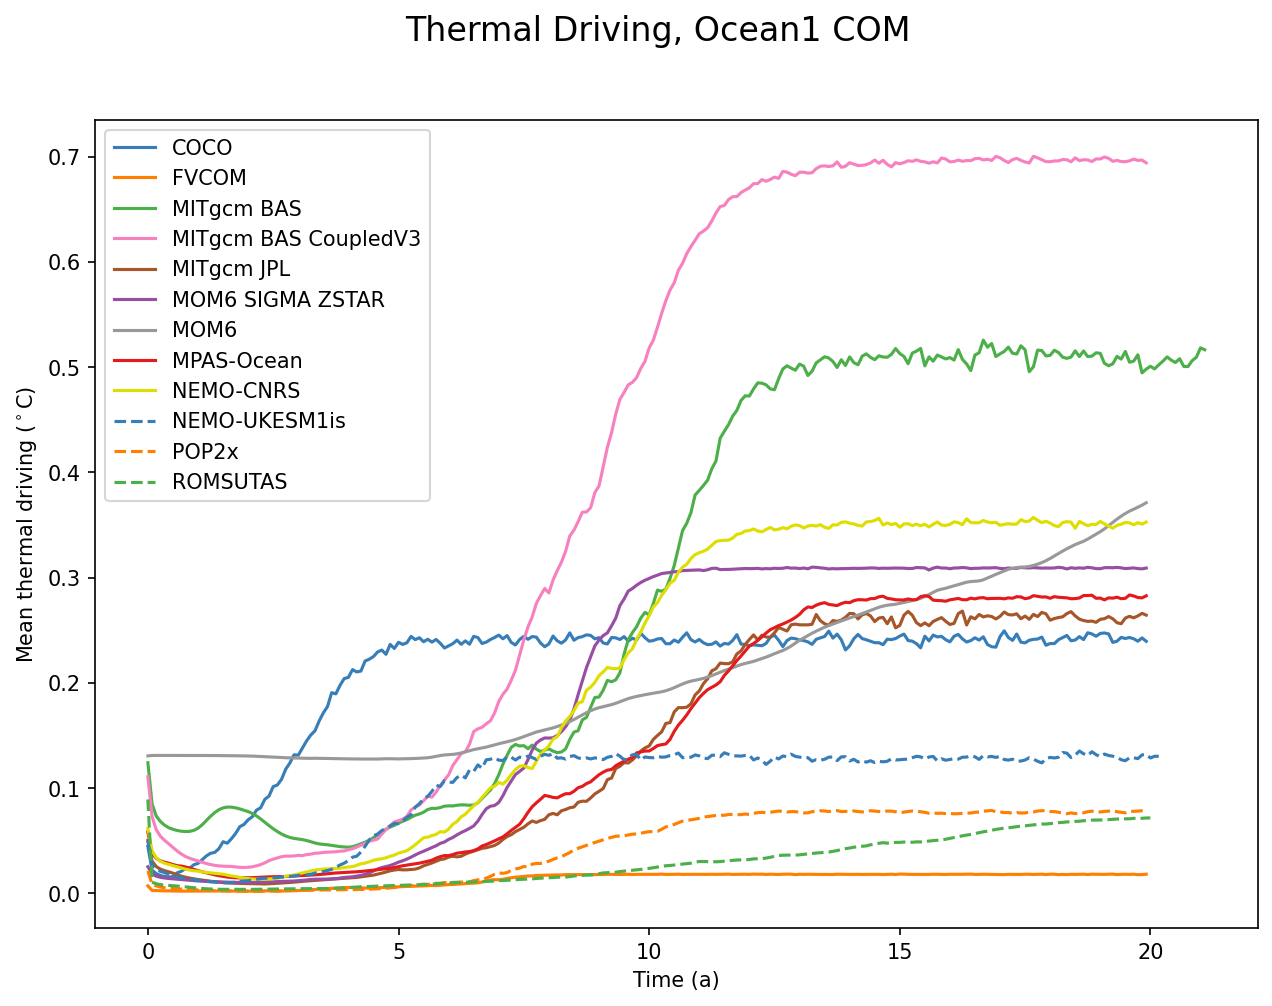

In [14]:
expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)
fig = plt.figure(figsize=(10,7),facecolor='w',dpi = 150)
for i in np.arange(length):
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    fr = data.thermalDriving
    mr = data.meltRate # use this and .where() to mask out parts of domain that aren't melting
    fr = fr.where(mr < 1e36).where(mr !=0).mean(['nx','ny'])#.plot()
    plt.plot(fr.nTime/12, (fr),label = labels[i])
fig.suptitle('Thermal Driving, Ocean1 COM', fontsize = 16);
plt.ylabel('Mean thermal driving ($^\circ$C)')
plt.xlabel('Time (a)')
plt.legend()